In [ ]:
import pandas as pd
import numpy as np
import sounddevice as sd
import soundfile as sf
import librosa
import os
import sys
from multiprocessing import Pool
import matplotlib.pyplot as plt
import re

In [402]:
def get_wav_duration(filename):
    return librosa.get_duration(path=filename)


In [521]:
def play_wav(filename, device_id=None, volume=1.0, duration=3):
    """
    Play a WAV file for a specific duration on a specific device with adjustable volume.

    Parameters:
    - filename: Path to the WAV file
    - device_id: Index of the audio output device (None = default)
    - volume: Volume multiplier (1.0 = normal, 0.5 = half, 2.0 = double)
    - duration: Duration to play in seconds (default is 3 seconds)
    """
    # Read the audio file
    data, samplerate = sf.read(filename)

    # Adjust the volume (Ensure values stay in range [-1, 1])
    data = np.clip(data * volume, -1.0, 1.0)

    # Calculate the number of samples to play based on the desired duration
    num_samples = int(samplerate * duration)

    # Slice the data to only include the first `duration` seconds
    data = data[:num_samples]

    # Play the modified audio
    sd.play(data, samplerate, device=device_id)
    sd.wait()  # Wait until playback is done

In [404]:
test_file = r"H:\DSP_project\ignoredir\data_test\Recording.wav"

In [405]:
play_wav(test_file, device_id=7, volume=0.2)


In [406]:
get_wav_duration(test_file)


4.45

# Dataset 1

In [407]:
path = r"H:\DSP_project\ignoredir\dataset\archive\music_dataset"

data = []
for folder in os.listdir(path):
    folder_path = os.path.join(path, folder)
    if os.path.isdir(folder_path):  # Ensure it's a folder
        files = os.listdir(folder_path)  # List only files in the folder
        data.extend([(os.path.join(folder_path, file), folder) for file in files])
        
df = pd.DataFrame(data, columns=["fname", "Class"])
df.sort_values("Class", inplace= True)   
df.reset_index(inplace=True, drop=True)

df["duration"] = df["fname"].map(get_wav_duration)

# with Pool(processes=6) as pool:  # Use only real cores
#     test["duration"] = list(pool.imap_unordered(get_wav_duration, test["fname"]))

In [408]:
display(df.sample(10))
print("shape:", df.shape)
print("class: ",df["Class"].unique())
print("class amount: ", len(df["Class"].unique()))
display(df["duration"].describe())

,fname,Class,duration
17169,H:\DSP_project\ignoredir\dataset\archive\music...,Drum_set,3.0
42176,H:\DSP_project\ignoredir\dataset\archive\music...,vibraphone,3.0
15694,H:\DSP_project\ignoredir\dataset\archive\music...,Drum_set,3.0
20400,H:\DSP_project\ignoredir\dataset\archive\music...,Floor_Tom,3.0
18826,H:\DSP_project\ignoredir\dataset\archive\music...,Electro_Guitar,3.0
33586,H:\DSP_project\ignoredir\dataset\archive\music...,Trombone,3.0
23555,H:\DSP_project\ignoredir\dataset\archive\music...,Horn,3.0
19603,H:\DSP_project\ignoredir\dataset\archive\music...,Electro_Guitar,3.0
28784,H:\DSP_project\ignoredir\dataset\archive\music...,Organ,3.0
33064,H:\DSP_project\ignoredir\dataset\archive\music...,Trombone,3.0


shape: (42311, 3)
class:  ['Accordion' 'Acoustic_Guitar' 'Banjo' 'Bass_Guitar' 'Clarinet' 'Cymbals'
 'Dobro' 'Drum_set' 'Electro_Guitar' 'Floor_Tom' 'Harmonica' 'Harmonium'
 'Hi_Hats' 'Horn' 'Keyboard' 'Mandolin' 'Organ' 'Piano' 'Saxophone'
 'Shakers' 'Tambourine' 'Trombone' 'Trumpet' 'Ukulele' 'Violin' 'cowbell'
 'flute' 'vibraphone']
class amount:  28


count    42311.0
mean         3.0
std          0.0
min          3.0
25%          3.0
50%          3.0
75%          3.0
max          3.0
Name: duration, dtype: float64

In [409]:
test

,fname,FileName,duration,Class
0,H:\DSP_project\ignoredir\dataset\archive2\Trai...,04-47367.wav,7.440000,Sound_Violin
1,H:\DSP_project\ignoredir\dataset\archive2\Trai...,059960_sonido2-sincopa-alta-7mp3-47316.wav,8.064000,Sound_Violin
2,H:\DSP_project\ignoredir\dataset\archive2\Trai...,066166_qui-c39est-qu39est-tombe-loop-t85wav-39...,5.712000,Sound_Violin
3,H:\DSP_project\ignoredir\dataset\archive2\Trai...,0_emil-telmanyi_bwv1001.wav,60.000000,Sound_Violin
4,H:\DSP_project\ignoredir\dataset\archive2\Trai...,0_emil-telmanyi_bwv1002.wav,60.000000,Sound_Violin
...,...,...,...,...
776,H:\DSP_project\ignoredir\dataset\archive2\Trai...,Vn-ord-G6-ff-2c.wav,7.060023,Sound_Violin
777,H:\DSP_project\ignoredir\dataset\archive2\Trai...,Vn-ord-G6-mf-1c.wav,8.042472,Sound_Violin
778,H:\DSP_project\ignoredir\dataset\archive2\Trai...,Vn-ord-G6-mf-2c.wav,7.218821,Sound_Violin
779,H:\DSP_project\ignoredir\dataset\archive2\Trai...,Vn-ord-G6-pp-1c.wav,7.556735,Sound_Violin


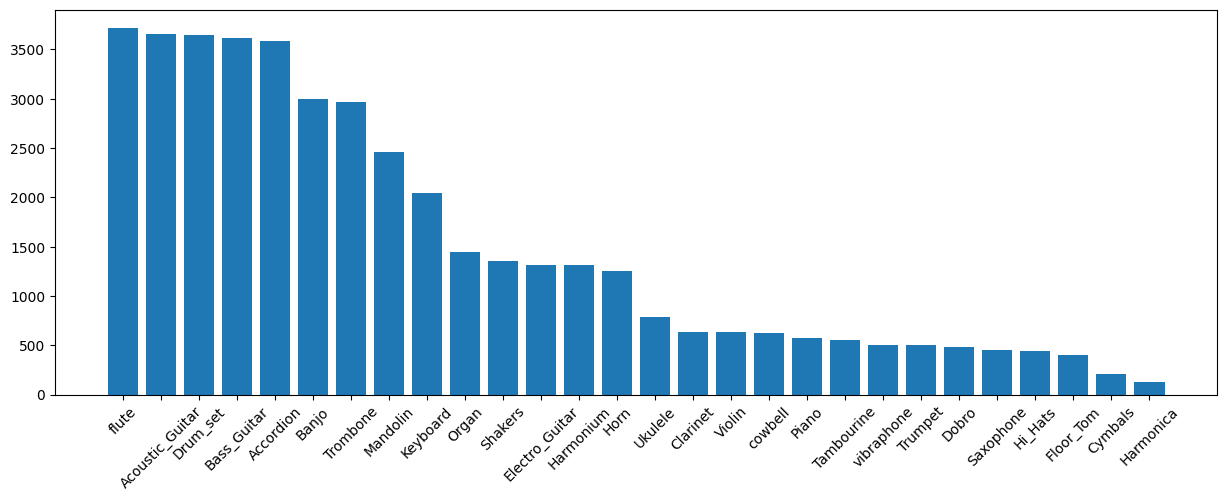

In [410]:
test = df.value_counts("Class")
plt.figure(figsize=(15,5))
plt.bar(test.index, test, )
plt.xticks(rotation=45)
plt.show()

In [411]:
play_wav(df.loc[5303, "fname"], device_id=7, volume=0.2)

# Dataset 2

## train

In [412]:
path = r"H:\DSP_project\ignoredir\dataset\archive2\Metadata_Train.csv"
df = pd.read_csv(path)
# df.drop_duplicates("FileName", keep=False, inplace=True)
display(df.sample(10))
print("shape:", df.shape)
print("class: ",df["Class"].unique())
print("class amount: ", len(df["Class"].unique()))


,FileName,Class
1516,DRUM_SOUND (46).wav,Sound_Violin
300,G53-53208-1111-256.wav,Sound_Guitar
1966,WaveDrum02_45SD (1).wav,Sound_Violin
488,latin_7_130BPM.wav,Sound_Guitar
2237,ROOM_room1_MUS_scale_DEV_stereomic.wav,Sound_Piano
2535,ROOM_room7_MUS_joplin_DEV_lg.wav,Sound_Piano
760,dr-tribal-percussion-triplet-loop-high-passed-...,Sound_Drum
1581,hi-hat-rhythm-89806.wav,Sound_Violin
160,FS_Lick12_FN.wav,Sound_Guitar
1886,WaveDrum02_43HH (27).wav,Sound_Violin


shape: (2629, 2)
class:  ['Sound_Guitar' 'Sound_Drum' 'Sound_Violin' 'Sound_Piano']
class amount:  4


In [413]:
path = r"H:\DSP_project\ignoredir\dataset\archive2\Train_submission\Train_submission"
print("file number: ", len(os.listdir(path)))
sub_df = pd.DataFrame({"fname":[os.path.join(path, file) for file in os.listdir(path)]})
sub_df["FileName"] = sub_df["fname"].map(lambda cell: os.path.split(cell)[-1])
sub_df["duration"] = sub_df["fname"].map(get_wav_duration)
# sub_df.drop("fname", axis=1, inplace=True)
sub_df

file number:  2628


,fname,FileName,duration
0,H:\DSP_project\ignoredir\dataset\archive2\Trai...,029500_morning-rain-piano-65875.wav,38.712000
1,H:\DSP_project\ignoredir\dataset\archive2\Trai...,035568_upright-piano-71570.wav,28.512000
2,H:\DSP_project\ignoredir\dataset\archive2\Trai...,04-47367.wav,7.440000
3,H:\DSP_project\ignoredir\dataset\archive2\Trai...,046578_tribal-drum-rhythms-03wav-68096.wav,16.008000
4,H:\DSP_project\ignoredir\dataset\archive2\Trai...,054399_8039s-old-school-rap-drum-loop-80433.wav,10.728000
...,...,...,...
2623,H:\DSP_project\ignoredir\dataset\archive2\Trai...,WaveDrum02_45SD (95).wav,14.860771
2624,H:\DSP_project\ignoredir\dataset\archive2\Trai...,WaveDrum02_45SD (96).wav,17.089887
2625,H:\DSP_project\ignoredir\dataset\archive2\Trai...,WaveDrum02_45SD (97).wav,17.846848
2626,H:\DSP_project\ignoredir\dataset\archive2\Trai...,WaveDrum02_45SD (98).wav,12.923084


In [414]:
test = df[df["FileName"].duplicated(keep="first")].sort_values("FileName").copy()

In [415]:
test.loc[test["FileName"].str.contains("drum",regex=True, case=False), "NewClass"] = "Sound_Drum"
test.loc[test["FileName"].str.contains("violin",regex=True, case=False), "NewClass"] = "Sound_Violin"
test.loc[test["FileName"].str.contains("piano",regex=True, case=False), "NewClass"] = "Sound_Piano"


In [416]:
test = test.dropna()
test["Class"] = test["NewClass"]
test = test[["FileName", "Class"]]
test

,FileName,Class
1401,046578_tribal-drum-rhythms-03wav-68096.wav,Sound_Drum
1402,054399_8039s-old-school-rap-drum-loop-80433.wav,Sound_Drum
1403,056514_drum-40118.wav,Sound_Drum
1405,060311_rubbing-drum-sticksaif-82905.wav,Sound_Drum
1406,065339_metal-bass-drum-90850.wav,Sound_Drum
...,...,...
1596,lckk_118_drum_01_full-43553.wav,Sound_Drum
1601,marching-drums-drum-solo2-fx-99061.wav,Sound_Drum
1609,odddrumloop-91606.wav,Sound_Drum
1610,on-rd-bruce-drums-1-89708.wav,Sound_Drum


In [417]:
df = df.drop_duplicates("FileName", keep=False)
df

,FileName,Class
0,1-E1-Major 00.wav,Sound_Guitar
1,1-E1-Major 01.wav,Sound_Guitar
2,1-E1-Major 02.wav,Sound_Guitar
3,1-E1-Major 03.wav,Sound_Guitar
4,1-E1-Major 04.wav,Sound_Guitar
...,...,...
2624,strange-piano-73881.wav,Sound_Piano
2625,the-last-piano-112677.wav,Sound_Piano
2626,this-is-war-version-e-95411.wav,Sound_Piano
2627,tired-ghosts-piano-65013.wav,Sound_Piano


In [418]:
df = pd.concat([df,test])
df = df.reset_index(drop=True)

In [419]:
df.value_counts("Class")

Class
Sound_Guitar    700
Sound_Drum      619
Sound_Piano     528
Name: count, dtype: int64

In [424]:
df

,FileName,Class
0,1-E1-Major 00.wav,Sound_Guitar
1,1-E1-Major 01.wav,Sound_Guitar
2,1-E1-Major 02.wav,Sound_Guitar
3,1-E1-Major 03.wav,Sound_Guitar
4,1-E1-Major 04.wav,Sound_Guitar
...,...,...
1842,lckk_118_drum_01_full-43553.wav,Sound_Drum
1843,marching-drums-drum-solo2-fx-99061.wav,Sound_Drum
1844,odddrumloop-91606.wav,Sound_Drum
1845,on-rd-bruce-drums-1-89708.wav,Sound_Drum


In [420]:
# play_wav(r"H:\DSP_project\ignoredir\dataset\archive2\Train_submission\RealDrum01_00SDtrain.wav", device_id=7, volume=0.2)

In [421]:
df_merge = pd.merge(left=sub_df, right=df, how="left", on="FileName")
df.sample(10)

,FileName,Class
566,LP_Lick8_MN.wav,Sound_Guitar
1572,WaveDrum02_43HH (15).wav,Sound_Drum
1398,TechnoDrum01_07MIX.wav,Sound_Drum
101,AR_NH_IV.wav,Sound_Guitar
376,G53-62503-1111-00134.wav,Sound_Guitar
362,G53-61311-1111-194.wav,Sound_Guitar
1277,DRUM_SOUND (46).wav,Sound_Drum
1171,ROOM_room8_MUS_beethoven1_DEV_redmi.wav,Sound_Piano
925,ROOM_room3_MUS_joplin_DEV_lg.wav,Sound_Piano
1027,ROOM_room5_MUS_chords_DEV_lg.wav,Sound_Piano


In [423]:
df_merge

,fname,FileName,duration,Class
0,H:\DSP_project\ignoredir\dataset\archive2\Trai...,029500_morning-rain-piano-65875.wav,38.712000,Sound_Piano
1,H:\DSP_project\ignoredir\dataset\archive2\Trai...,035568_upright-piano-71570.wav,28.512000,Sound_Piano
2,H:\DSP_project\ignoredir\dataset\archive2\Trai...,04-47367.wav,7.440000,NaN
3,H:\DSP_project\ignoredir\dataset\archive2\Trai...,046578_tribal-drum-rhythms-03wav-68096.wav,16.008000,Sound_Drum
4,H:\DSP_project\ignoredir\dataset\archive2\Trai...,054399_8039s-old-school-rap-drum-loop-80433.wav,10.728000,Sound_Drum
...,...,...,...,...
2623,H:\DSP_project\ignoredir\dataset\archive2\Trai...,WaveDrum02_45SD (95).wav,14.860771,Sound_Drum
2624,H:\DSP_project\ignoredir\dataset\archive2\Trai...,WaveDrum02_45SD (96).wav,17.089887,Sound_Drum
2625,H:\DSP_project\ignoredir\dataset\archive2\Trai...,WaveDrum02_45SD (97).wav,17.846848,Sound_Drum
2626,H:\DSP_project\ignoredir\dataset\archive2\Trai...,WaveDrum02_45SD (98).wav,12.923084,Sound_Drum


In [486]:
def fill_violin_class(row):
    if re.findall("violin", row["FileName"], flags=re.IGNORECASE):
        return "Sound_Violin"
    else:
        return row["Class"]

In [487]:
df_merge.loc[df_merge["Class"].isna(),"Class"] = df_merge.loc[df_merge["Class"].isna()].apply(fill_violin_class, axis=1)

In [491]:
display(df_merge.value_counts("Class"))
print(df_merge.shape)

Class
Sound_Guitar    700
Sound_Drum      619
Sound_Piano     528
Sound_Violin    387
Name: count, dtype: int64

(2628, 4)


In [529]:
df_merge[df_merge["Class"].isna()]

,fname,FileName,duration,Class
2,H:\DSP_project\ignoredir\dataset\archive2\Trai...,04-47367.wav,7.440000,NaN
6,H:\DSP_project\ignoredir\dataset\archive2\Trai...,059960_sonido2-sincopa-alta-7mp3-47316.wav,8.064000,NaN
9,H:\DSP_project\ignoredir\dataset\archive2\Trai...,066166_qui-c39est-qu39est-tombe-loop-t85wav-39...,5.712000,NaN
11,H:\DSP_project\ignoredir\dataset\archive2\Trai...,0_emil-telmanyi_bwv1001.wav,60.000000,NaN
12,H:\DSP_project\ignoredir\dataset\archive2\Trai...,0_emil-telmanyi_bwv1002.wav,60.000000,NaN
...,...,...,...,...
2223,H:\DSP_project\ignoredir\dataset\archive2\Trai...,Vn-ord-G6-ff-2c.wav,7.060023,NaN
2224,H:\DSP_project\ignoredir\dataset\archive2\Trai...,Vn-ord-G6-mf-1c.wav,8.042472,NaN
2225,H:\DSP_project\ignoredir\dataset\archive2\Trai...,Vn-ord-G6-mf-2c.wav,7.218821,NaN
2226,H:\DSP_project\ignoredir\dataset\archive2\Trai...,Vn-ord-G6-pp-1c.wav,7.556735,NaN


In [497]:
test = df_merge[df_merge["Class"].isna()].reset_index(drop=True)

In [509]:
test.sample(10)

,fname,FileName,duration,Class
299,H:\DSP_project\ignoredir\dataset\archive2\Trai...,Va-ord-F6-mf-1c.wav,7.106122,NaN
213,H:\DSP_project\ignoredir\dataset\archive2\Trai...,dnb-bass2-106724.wav,10.848000,NaN
300,H:\DSP_project\ignoredir\dataset\archive2\Trai...,Va-ord-F6-pp-1c.wav,7.240204,NaN
254,H:\DSP_project\ignoredir\dataset\archive2\Trai...,muvibeat9_130bpm-14339.wav,18.494694,NaN
134,H:\DSP_project\ignoredir\dataset\archive2\Trai...,1_oliver-colbentson_bwv1006_mov5.wav,59.118980,NaN
324,H:\DSP_project\ignoredir\dataset\archive2\Trai...,Vn-ord-B5-mf-1c.wav,6.846961,NaN
378,H:\DSP_project\ignoredir\dataset\archive2\Trai...,Vn-ord-F6-mf-1c.wav,7.248571,NaN
374,H:\DSP_project\ignoredir\dataset\archive2\Trai...,Vn-ord-F5-pp-1c.wav,7.336281,NaN
272,H:\DSP_project\ignoredir\dataset\archive2\Trai...,Va-ord-C5-ff-2c.wav,7.691882,NaN
253,H:\DSP_project\ignoredir\dataset\archive2\Trai...,muvibeat8_130bpm-14338.wav,32.339592,NaN


In [510]:
play_wav(test.loc[253, "fname"], device_id=7, volume=0.5)

In [526]:
match_class = {k:v for k,v in zip(["d", "v", "g", "p"], ["Sound_Drum", "Sound_Violin", "Sound_Guitar", "Sound_Piano"])}

def fill_manual_class(row):
    play_wav(row["fname"], device_id=7, volume=0.5, duration=3)
    code = input(f"row{row.name} {row.FileName}: ")
    if code not in ["d", "v", "g", "p", "n"]:
        raise AttributeError("Invalid Class")
    else:
        if code == "n":
            return row["Class"]
        label = match_class[code]
        return label

In [527]:
df_merge.loc[df_merge["Class"].isna(),"Class"] = df_merge.loc[df_merge["Class"].isna()].apply(fill_manual_class, axis=1)

AttributeError: Invalid Class

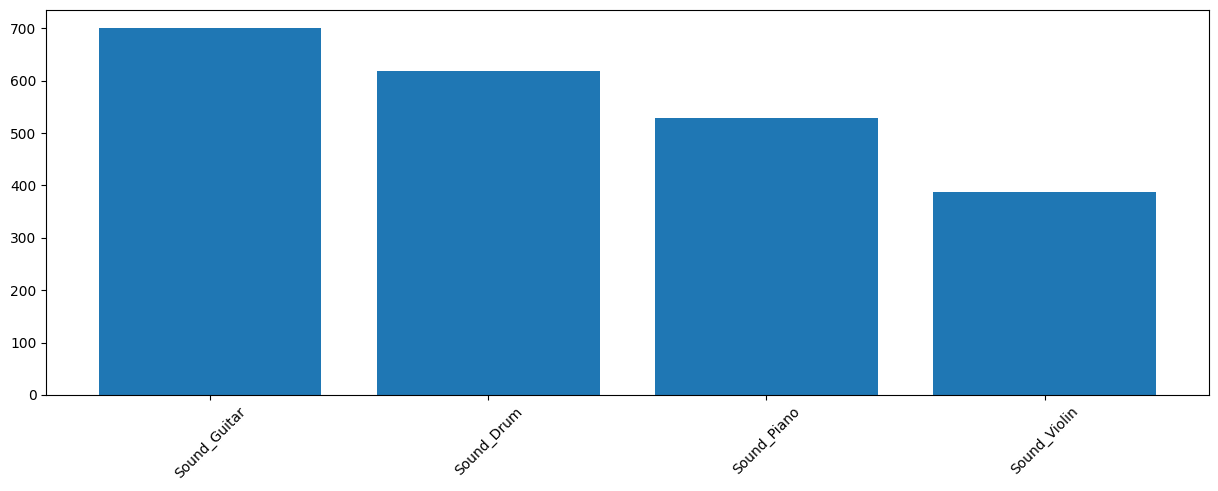

In [495]:
test = df_merge.value_counts("Class")
plt.figure(figsize=(15,5))
plt.bar(test.index, test, )
plt.xticks(rotation=45)
plt.show()

## test

In [ ]:
path = r"H:\DSP_project\ignoredir\dataset\archive2\Metadata_Test.csv"
df = pd.read_csv(path)
display(df.sample(10))
print("shape:", df.shape)
print("class: ",df["Class"].unique())
print("class amount: ", len(df["Class"].unique()))

,FileName,Class
10,rock_1_100BPM.wav,Sound_Guiatr
26,muvibeat4_130bpm-14334.wav,Sound_Drum
30,phaze-giant-bass-69687.wav,Sound_Drum
70,short-logo-108964.wav,Sound_Piano
6,guitar-song-57789.wav,Sound_Guiatr
22,hip-hop-drum-loop-22-33572.wav,Sound_Drum
78,wondercue-111933.wav,Sound_Piano
77,wingrandpiano-96338.wav,Sound_Piano
79,yuwu-quiz-113046.wav,Sound_Piano
33,psy-bass-beat-sample-101275.wav,Sound_Drum


shape: (80, 2)
class:  ['Sound_Guiatr' 'Sound_Drum' 'Sound_Violin' 'Sound_Piano']
class amount:  4


In [ ]:
df[df["FileName"].duplicated(keep=False)].sort_values("FileName").head(10)

,FileName,Class


In [ ]:
path = r"H:\DSP_project\ignoredir\dataset\archive2\Test_submission\Test_submission"
print("file number: ", len(os.listdir(path)))
sub_df = pd.DataFrame({"fname":[os.path.join(path, file) for file in os.listdir(path)]})
sub_df["FileName"] = sub_df["fname"].map(lambda cell: os.path.split(cell)[-1])
sub_df["duration"] = sub_df["fname"].map(get_wav_duration)
# sub_df.drop("fname", axis=1, inplace=True)
sub_df

file number:  80


,fname,FileName,duration
0,H:\DSP_project\ignoredir\dataset\archive2\Test...,100bpm-808-like-drum-loop-74838.wav,19.272000
1,H:\DSP_project\ignoredir\dataset\archive2\Test...,acoustic-guitar-logo-13084.wav,5.982041
2,H:\DSP_project\ignoredir\dataset\archive2\Test...,darbuka-drum-percussion-64018.wav,31.425306
3,H:\DSP_project\ignoredir\dataset\archive2\Test...,guitar-chords-70663.wav,16.848000
4,H:\DSP_project\ignoredir\dataset\archive2\Test...,guitar-intro-110935.wav,22.200000
...,...,...,...
75,H:\DSP_project\ignoredir\dataset\archive2\Test...,whatever-you-say-piano-27291.wav,21.096000
76,H:\DSP_project\ignoredir\dataset\archive2\Test...,wingrandpiano-96338.wav,3.840000
77,H:\DSP_project\ignoredir\dataset\archive2\Test...,wondercue-111933.wav,29.805714
78,H:\DSP_project\ignoredir\dataset\archive2\Test...,world-drum-beat-76217.wav,24.072000


In [ ]:
df = pd.merge(left=sub_df, right=df, how="left", on="FileName")
df.sample(10)

,fname,FileName,duration,Class
51,H:\DSP_project\ignoredir\dataset\archive2\Test...,Sad-Violin-Lower-F-www.fesliyanstudios.com.wav,6.072000,Sound_Violin
67,H:\DSP_project\ignoredir\dataset\archive2\Test...,Va-ord-F3-mf-4c.wav,7.199977,Sound_Violin
45,H:\DSP_project\ignoredir\dataset\archive2\Test...,Sad-Violin-C-www.fesliyanstudios.com.wav,7.896000,Sound_Violin
13,H:\DSP_project\ignoredir\dataset\archive2\Test...,intro-music-black-box-simple-guitar-12701.wav,42.736327,Sound_Guiatr
23,H:\DSP_project\ignoredir\dataset\archive2\Test...,psy-bass-beat-sample-101275.wav,8.112000,Sound_Drum
68,H:\DSP_project\ignoredir\dataset\archive2\Test...,Va-ord-F4-ff-2c.wav,7.581723,Sound_Violin
11,H:\DSP_project\ignoredir\dataset\archive2\Test...,hip-hop-drum-loop-22-33572.wav,36.336000,Sound_Drum
21,H:\DSP_project\ignoredir\dataset\archive2\Test...,pop-drums-loops-3-11278.wav,10.684082,Sound_Drum
14,H:\DSP_project\ignoredir\dataset\archive2\Test...,kitchen-drum200616_0006_01-39711.wav,7.056000,Sound_Drum
56,H:\DSP_project\ignoredir\dataset\archive2\Test...,si-80238.wav,3.240000,Sound_Piano


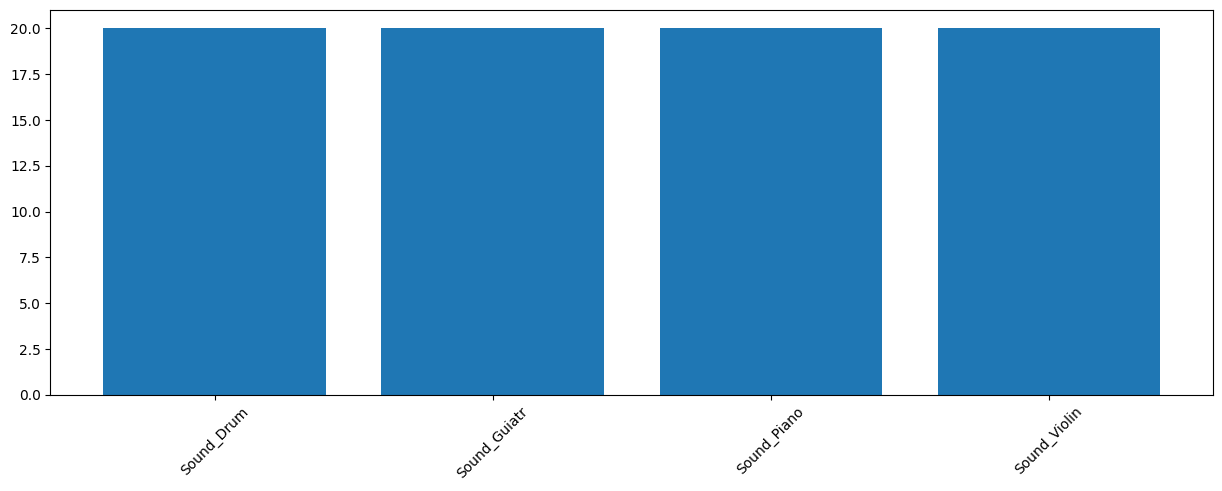

In [ ]:
test = df.value_counts("Class")
plt.figure(figsize=(15,5))
plt.bar(test.index, test, )
plt.xticks(rotation=45)
plt.show()